In [2]:
import pandas as pd


In [3]:
labels = pd.read_feather('../climate-policy-instruments/data/labels.feather')
print(labels.shape)
labels = labels[labels['id'].str.contains('W')].sample(1500)
labels = labels.drop_duplicates('nacsos_id')
print(labels.shape)
labels

(2580, 109)
(1500, 109)


,nacsos_id,title,abstract,0 - relevant,10 - 3. Quantitative,10 - 4. Qualitative,2 - 0. Mitigation,2 - 1. Adaptation,3 - 0. Not policy related,3 - 1. Analysis of an existing policy / concrete proposal,...,5 – 4.17. Government administration & management,5 - 4.17. Government administration & management,representative_sample,representative_relevant,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,id
690,496970,Have we been here before? Will nuclear history...,At least before the Fukushima accident of Marc...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,W1990233205
1982,1907045,Price transmission mechanism and socio-economi...,Cities are important bases of economic develop...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0.0,1.0,1.0,1.0,0.0,W2900743902
2575,3878253,Effectiveness of China's plug-in electric vehi...,Subsidies for promoting plug-in electric vehic...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0.0,1.0,0.0,1.0,0.0,W2998928373
1884,1866371,Translating to risk: The legibility of climate...,The growth of climate field of investment used...,1.0,0.0,NaN,1.0,1.0,0.0,0.0,...,0,0,0,1,0.0,0.0,0.0,1.0,1.0,W2621143988
579,418838,Identification of management strategies for CO...,Geologic sequestration has been considered as ...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,W2010672403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,791901,California's Cap-and-Trade System: Diffusion a...,This article investigates the roles of policy ...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,2.0,0.0,1.0,1.0,0.0,W2725515476
267,195394,Carbon storage potential of harvested wood: su...,"Within national greenhouse gas inventories, ma...",1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,W1973608555
972,654849,"Leaf area reduction by trimming, a growing tec...",The aim of this work is the evaluation of the ...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0.0,0.0,0.0,0.0,0.0,W1939979180
838,584652,Influence of droughts to the radial growth of ...,Dendroclimatological research on the radial gr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0.0,0.0,0.0,0.0,0.0,W2184349252


In [3]:
import re
df = pd.read_feather('../climate-policy-instruments/data/oa.feather')
in_labels = df[df['id'].isin(labels['id'])].copy()
df = df.sample(frac=0.05).reset_index(drop=True)
print(df.shape)
def tslug(s):
    return re.sub('\W','',s).lower()
df["tslug"] = df["title"].astype(str).apply(tslug)
in_labels["tslug"] = in_labels["title"].astype(str).apply(tslug)
df = df.drop_duplicates('tslug')
df = df[~df['tslug'].isin(in_labels['tslug'])]
df = pd.concat([in_labels, df]).reset_index(drop=True)
df = df.drop_duplicates('tslug').sample(frac=1).reset_index(drop=True).drop(columns='tslug')
print(df.shape)
df.to_feather('data/documents.feather')

(51319, 6)
(52285, 6)


In [4]:
list(labels.columns)
cols = ['id','title','abstract','INCLUDE']
cols += [x for x in labels.columns if re.match('^4 -',x)]
cols += [x for x in labels.columns if re.match('^8 -',x)]
cols
labels[cols].reset_index(drop=True).to_feather('data/labels.feather')

<Axes: >

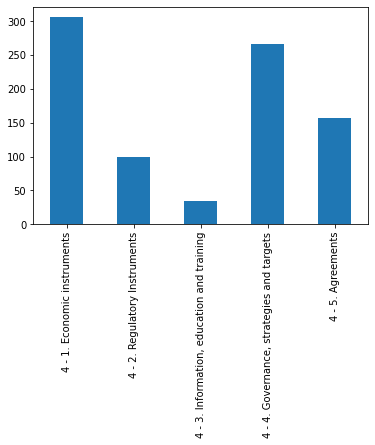

In [5]:
instruments = [x for x in labels.columns if "4 -" in x]
labels[instruments].sum().plot.bar()

In [8]:
import re
df = pd.read_feather('data/labels.feather').query('INCLUDE==1').sample(32, random_state=2023).reset_index(drop=True)
y_prefix = '4 -'
targets = [x for x in df.columns if re.match(f'^{y_prefix}',x)]
print(df[targets].values.astype(int))
df['labels'] = list(df[targets].values.astype(int))

[[0 0 1 0 0]
 [1 0 0 0 2]
 [1 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [2 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 1]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [2 0 0 2 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 2 2]
 [0 0 0 0 1]
 [1 0 1 0 0]
 [1 0 0 1 1]
 [1 0 0 0 0]
 [0 0 0 1 0]]


In [6]:
targets

[]